In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize
x_test = x_test.astype('float32') / 255.0
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [10]:
# Build CNN model (more complex for color images)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [11]:
# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,810 (737.54 KB)

 Trainable params: 188,810 (737.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 93ms/step - accuracy: 0.2881 - loss: 1.8960 - val_accuracy: 0.4980 - val_loss: 1.3907
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.4928 - loss: 1.4015 - val_accuracy: 0.5736 - val_loss: 1.1908
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.5616 - loss: 1.2282 - val_accuracy: 0.6239 - val_loss: 1.0631
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.6089 - loss: 1.1073 - val_accuracy: 0.6544 - val_loss: 0.9924
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.6395 - loss: 1.0279 - val_accuracy: 0.6678 - val_loss: 0.9308
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.6641 - loss: 0.9631 - val_accuracy: 0.6587 - val_loss: 0.9451
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.6843 - loss: 0.9047 - val_accuracy: 0.6903 - val_loss: 0.8894
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.6961 - loss: 0.8645 - 

In [13]:
# Function to preprocess custom image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32, 32))
    img = img.astype('float32') / 255.0
    img = img.reshape(1, 32, 32, 3)
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


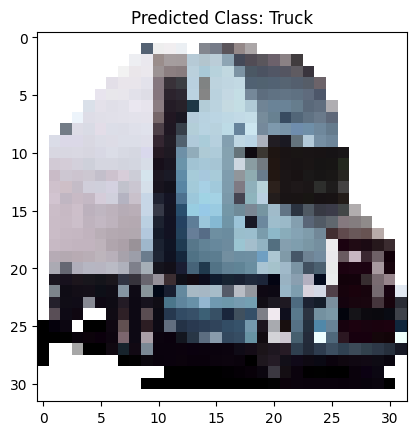

In [16]:
# Test with custom image (replace 'object.png' with your image path)
custom_img = preprocess_image('truck.png')
prediction = model.predict(custom_img)
predicted_class = np.argmax(prediction, axis=1)[0]
plt.imshow(custom_img.reshape(32, 32, 3))
plt.title(f'Predicted Class: {class_names[predicted_class]}')
plt.show()